In [1]:
# modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# helper functions
def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def yhat(x, W1, b1, W2, b2, V, c):
    # returns model prediction 
    H1 = relu(np.dot(x,W1) + b1)
    H2 = relu(np.dot(H1,W2) + b2)
    y_hat = softmax(np.dot(H2,V) + c)
    return y_hat

def pack_params(param_vec):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3 = param_vec
    W1 = np.array([[w1_11,w1_12],[w1_21,w1_22],[w1_31,w1_32]]).T
    b1 = np.array([b1_1, b1_2, b1_3])
    W2 = np.array([[w2_11,w2_12,w2_13],[w2_21,w2_22,w2_23]]).T
    b2 = np.array([b2_1, b2_2])
    V = np.array([[v_11, v_12],[v_21, v_22],[v_31, v_32]]).T
    c = np.array([c_1, c_2, c_3])
    return((W1, b1, W2, b2, V, c))
    
def unpack_params(W1,b1,W2,b2,V,c):
    W1, W2, V = W1.T, W2.T, V.T
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32 = W1[0,0], W1[0,1], W1[1,0], W1[1,1], W1[2,0], W1[2,1]
    b1_1, b1_2, b1_3 = b1[0], b1[1], b1[2]
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23 = W2[0,0], W2[0,1], W2[0,2], W2[1,0], W2[1,1], W2[1,2]
    b2_1, b2_2 = b2[0], b2[1]
    v_11, v_12, v_21, v_22, v_31, v_32 = V[0,0], V[0,1], V[1,0], V[1,1], V[2,0], V[2,1]
    c_1, c_2, c_3 = c[0], c[1], c[2]
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3,  w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3])

# 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.
def grad_f(param_vec, x, y):
    W1, b1, W2, b2, V, c = pack_params(param_vec)
    
    a1 = x.dot(W1) + b1
    H1 = relu(a1)
    a2 = H1.dot(W2) + b2
    H2 = relu(a2)
    a3 = H2.dot(V) + c
    y_hat = softmax(a3)
    
    d_V_param = y_hat - y
    d_W2_param = d_V_param.dot(V.T) * (H2 > 0)
    d_W1_param = d_W2_param.dot(W2.T) * (H1 > 0)
    
    d_V = H2.T.dot(d_V_param)
    d_c = d_V_param.sum(axis=0)
    d_W2 = H1.T.dot(d_W2_param)
    d_b2 = (d_W2_param).sum(axis=0)
    d_W1 = x.T.dot(d_W1_param)
    d_b1 = (d_W1_param).sum(axis=0)
    
    param_vec = unpack_params(d_W1, d_b1, d_W2, d_b2, d_V, d_c)
    return np.array(param_vec)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


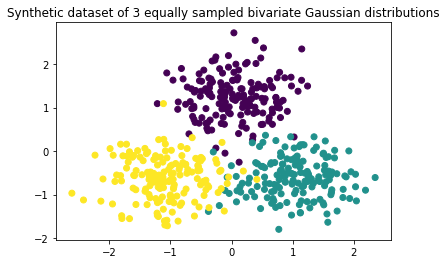

In [3]:
# 3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters
# that you’ll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

x,y,cl = gen_gmm_data(500)
plt.scatter(x[:,0], x[:,1], c=cl[0])
plt.title("Synthetic dataset of 3 equally sampled bivariate Gaussian distributions")
plt.show()

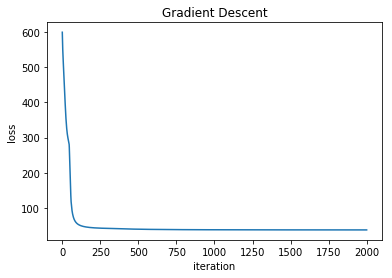

In [4]:
# 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-1,1,size=26).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(x, y, iterations=2000,learning_rate=1e-3)
plt.plot(losses)
plt.title("Gradient Descent")
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

In [ ]:
# 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.
def grad_descent_momentum(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-1,1,size=26).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(x, y, iterations=2000,learning_rate=1e-3)
plt.plot(losses)
plt.title("Gradient Descent with Momentum")
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()